In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('911.csv')

In [37]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Resaon,month,year,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,2015,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,2015,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,2015,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,2015,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,2015,Thu


In [11]:
df['Resaon'] = df['title'].apply(lambda x : x.split(':')[0])

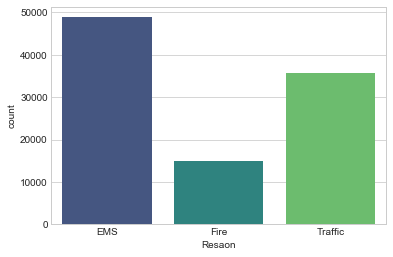

In [16]:
sns.countplot(x='Resaon',data=df,palette='viridis');

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Resaon       99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


In [18]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [21]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [23]:
df['month'] = df['timeStamp'].apply(lambda x:x.month)

In [24]:
df['month']

0        12
1        12
2        12
3        12
4        12
5        12
6        12
7        12
8        12
9        12
10       12
11       12
12       12
13       12
14       12
15       12
16       12
17       12
18       12
19       12
20       12
21       12
22       12
23       12
24       12
25       12
26       12
27       12
28       12
29       12
         ..
99462     8
99463     8
99464     8
99465     8
99466     8
99467     8
99468     8
99469     8
99470     8
99471     8
99472     8
99473     8
99474     8
99475     8
99476     8
99477     8
99478     8
99479     8
99480     8
99481     8
99482     8
99483     8
99484     8
99485     8
99486     8
99487     8
99488     8
99489     8
99490     8
99491     8
Name: month, Length: 99492, dtype: int64

In [25]:
df['year'] = df['timeStamp'].apply(lambda x:x.year)

In [27]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [30]:
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
99462    2
99463    2
99464    2
99465    2
99466    2
99467    2
99468    2
99469    2
99470    2
99471    2
99472    2
99473    2
99474    2
99475    2
99476    2
99477    2
99478    2
99479    2
99480    2
99481    2
99482    2
99483    2
99484    2
99485    2
99486    2
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

In [31]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

In [32]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
5        Thu
6        Thu
7        Thu
8        Thu
9        Thu
10       Thu
11       Thu
12       Thu
13       Thu
14       Thu
15       Thu
16       Thu
17       Thu
18       Thu
19       Thu
20       Thu
21       Thu
22       Thu
23       Thu
24       Thu
25       Thu
26       Thu
27       Thu
28       Thu
29       Thu
        ... 
99462    Wed
99463    Wed
99464    Wed
99465    Wed
99466    Wed
99467    Wed
99468    Wed
99469    Wed
99470    Wed
99471    Wed
99472    Wed
99473    Wed
99474    Wed
99475    Wed
99476    Wed
99477    Wed
99478    Wed
99479    Wed
99480    Wed
99481    Wed
99482    Wed
99483    Wed
99484    Wed
99485    Wed
99486    Wed
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

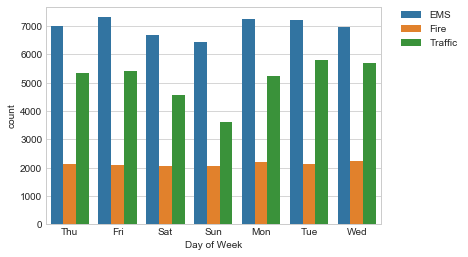

In [43]:
sns.countplot(x='Day of Week',data=df,hue='Resaon')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [41]:
sns.barplot(x=df['Day of Week'],y=df['Resaon'], data=df)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [44]:
df.groupby('month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Resaon,year,Day of Week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969
